## Implementation of ANN in Keras 

Using mnist dataset from Keras 

Here we would try to build an Artificial Neural Network that would predict the digits using the pixels of the images of the digits as inputs. 

In [3]:
import tensorflow as ts
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [21]:
data = tf.keras.datasets.mnist

In [22]:
data

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

Train-Test split

In [30]:
(x_train_full, y_train_full), (x_test, y_test) = data.load_data()

In [31]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
x_train_full.shape

(60000, 28, 28)

In [33]:
x_test_full.shape

(10000, 28, 28)

Making the first 5000 data of the training set as the validation data

In [34]:
x_valid, x_train = x_train_full[:5000] / 255. , x_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

x_test = x_test / 255.

In [40]:
print(len(x_train))
print(len(x_valid))
print(len(x_test))

55000
5000
10000


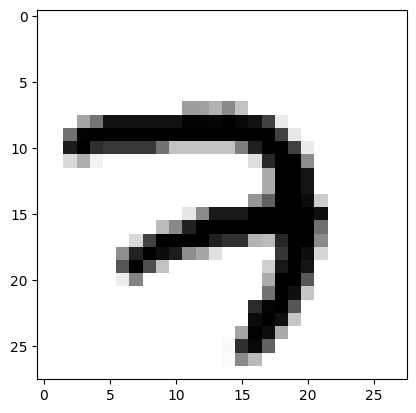

In [43]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

<Axes: >

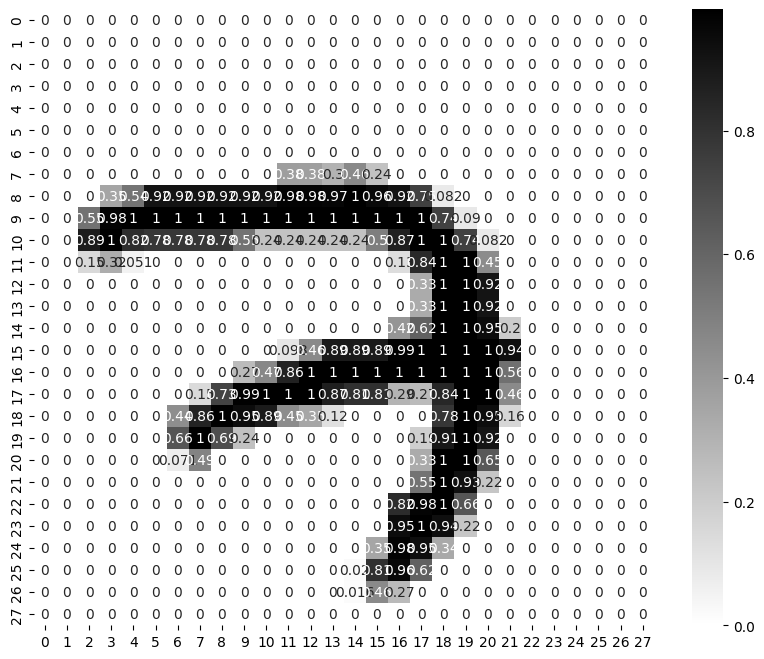

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train[0], annot=True, cmap='binary')

Model Building - Constructing multiple hidden layers of neurons in the percentron

In [47]:
LAYERS = [tf.keras.layers.Flatten(input_shape=(28,28), name= 'InputLayer'),
          tf.keras.layers.Dense(300, activation= 'relu', name = 'Layer1'),
          tf.keras.layers.Dense(100, activation= 'relu', name = 'Layer2'),
          tf.keras.layers.Dense(10, activation= 'softmax', name = 'OutputLayer')]

model = tf.keras.models.Sequential(LAYERS)

In [48]:
model.layers

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 Layer1 (Dense)              (None, 300)               235500    
                                                                 
 Layer2 (Dense)              (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The total number of trained parameters in the entire perceptron is 235500(in Layer1) + 30100(in Layer2) + 1010(OutputLayer) = 266610

In [52]:
layer1 = model.layers[1]

In [56]:
layer1.name

'Layer1'

In [58]:
layer1.get_weights()[0].shape

(784, 300)

The total number of weights in Layer1 is 784*300

In [60]:
layer1.get_weights()[1].shape

(300,)

The total number of biases in Layer1 is 300

Model Training with forward and backward propagation

In [68]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics='accuracy')

In [69]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6098 - accuracy: 0.8409 - val_loss: 0.3116 - val_accuracy: 0.9116
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2862 - accuracy: 0.9181 - val_loss: 0.2438 - val_accuracy: 0.9304
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2323 - accuracy: 0.9333 - val_loss: 0.2052 - val_accuracy: 0.9430
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1966 - accuracy: 0.9441 - val_loss: 0.1782 - val_accuracy: 0.9516
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1705 - accuracy: 0.9515 - val_loss: 0.1554 - val_accuracy: 0.9584
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1506 - accuracy: 0.9576 - val_loss: 0.1429 - val_accuracy: 0.9584
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1349 - accuracy: 0.9615 - val_loss: 0.1310 - val_accuracy:

In [70]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.609807,0.840945,0.311584,0.9116
1,0.286167,0.918127,0.243760,0.9304
2,0.232325,0.933309,0.205195,0.9430
3,0.196612,0.944091,0.178164,0.9516
4,0.170520,0.951455,0.155366,0.9584
5,0.150596,0.957564,0.142919,0.9584
6,0.134899,0.961455,0.131022,0.9640
7,0.121690,0.965836,0.122416,0.9658
8,0.110605,0.968745,0.115798,0.9672
9,0.101236,0.972000,0.109242,0.9702


With every epoch(or iteration) the loss is getting reduced and the accuracy is increasing. The graph below depicts the same.

<Axes: >

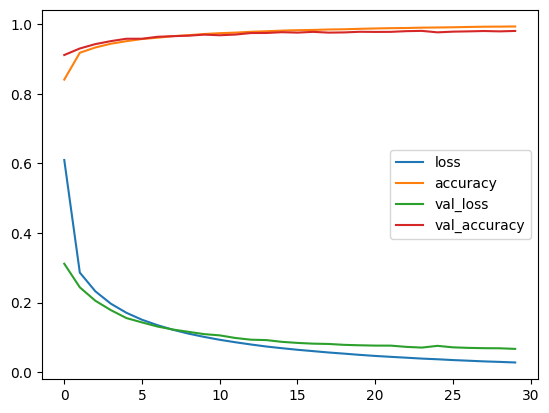

In [72]:
pd.DataFrame(history.history).plot()

It is good to observe that the loss is gettig reduced and the accuracy is increasing both for the training and validation data. This implies that model does not suffer from the problem of overfitting. 

Prediction for the unknown test data - The model would predict the probabilities with which the test data would fall in each class : here each digit from 0 to 9 represents each class of the dataset. 

In [73]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9807


[0.0676564946770668, 0.9807000160217285]

The loss is quite low and the accuracy is quite high for the test data.

Sample Check - Checking for the fist 3 images

In [75]:
x_unknown = x_test[:3]

In [76]:
actual = y_test[:3]

<Axes: >

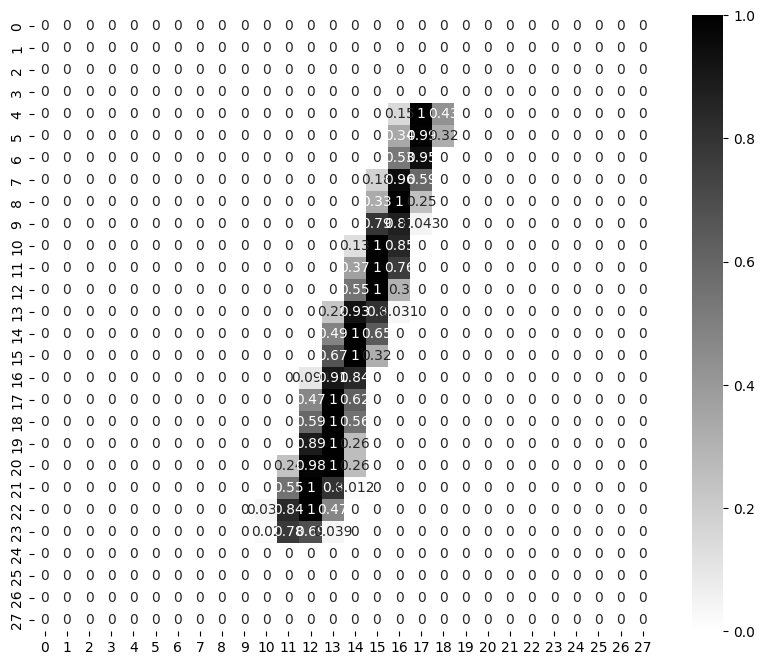

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(x_test[2], annot=True, cmap='binary')

The third element(image) of the 'x_unknown' dataset is showing the digit as '1'. It is expected that the model would also predict the digit as '1'. 

In [85]:
y_prob = model.predict(x_unknown)
y_prob.round(2) ## Rounding-off the probability to two digits

1/1 [==============================] - 0s 20ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [86]:
y_prob

array([[4.7774301e-07, 2.3475303e-07, 5.1434439e-05, 7.0863939e-04,
        9.4892902e-09, 6.1275824e-07, 7.4960619e-12, 9.9922264e-01,
        2.7190711e-06, 1.3261183e-05],
       [5.1854494e-07, 1.6633302e-04, 9.9978191e-01, 4.4394506e-05,
        9.3231835e-13, 3.1697047e-07, 2.6887456e-06, 4.4834626e-12,
        3.8181192e-06, 1.5177017e-12],
       [4.5721688e-07, 9.9821764e-01, 2.5360749e-04, 2.8205577e-05,
        9.4333293e-05, 3.1020987e-05, 8.8543293e-06, 6.2972074e-04,
        7.0477137e-04, 3.1312298e-05]], dtype=float32)

y_prob shows the probabilities with which each element(image) of the 'x_unknown' dataset would fall in each class : here each digit from 0 to 9 represents each class of the dataset. 

In [89]:
y_predict = np.argmax(y_prob, axis=-1)

In [90]:
y_predict

array([7, 2, 1])

With the help of 'argmax' we get the argument(digit) which has the maximum probability for each item of the 'x_unknown' daatset. Now we can see that our predictions i.e. 'y_predict' and actual are exactly the same. So our model is acurately predicting the unknown data. 